In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import statistics
import scipy.stats
import seaborn as sns
from scipy.stats import norm  
from sklearn import preprocessing
import seaborn as sns

# **1) Dataset Selection**

In [ ]:
missing = ['N/a','null','--','na']

In [ ]:
data = pd.read_csv("Bangalore.csv",na_values = missing)
data.shape

(533, 21)

In [ ]:
data.isnull().sum()

Area                   25
No. of Bedrooms        25
Location                0
Hospital               26
MaintenanceStaff       29
Gymnasium              20
CarParking             25
SwimmingPool           33
Landscaped Gardens     30
JoggingTrack           27
RainWaterHarvesting    31
IndoorGames            31
ShoppingMall           29
Intercom               26
SportsFacility         33
ATM                    32
ClubHouse              23
School                 22
24X7Security           22
PowerBackup            23
Price                  41
dtype: int64

In [ ]:
percentage = data.isnull().sum()*100 / len(data)
percentage

Area                   4.690432
No. of Bedrooms        4.690432
Location               0.000000
Hospital               4.878049
MaintenanceStaff       5.440901
Gymnasium              3.752345
CarParking             4.690432
SwimmingPool           6.191370
Landscaped Gardens     5.628518
JoggingTrack           5.065666
RainWaterHarvesting    5.816135
IndoorGames            5.816135
ShoppingMall           5.440901
Intercom               4.878049
SportsFacility         6.191370
ATM                    6.003752
ClubHouse              4.315197
School                 4.127580
24X7Security           4.127580
PowerBackup            4.315197
Price                  7.692308
dtype: float64

# **2) Data Cleaning**

In [ ]:
mean0 = data['Area'].mean()
data['Area'].fillna(mean0,inplace = True)

mean1 = data['Price'].mean()
data['Price'].fillna(mean1,inplace= True)

mean2 = data['No. of Bedrooms'].mean()
mean2 = math.ceil(mean2)
data['No. of Bedrooms'].fillna(mean2,inplace= True)
price=data["Price"].tolist()
area=data["Area"].tolist()

In [ ]:
col = list(data.columns)
col = col[3:-1]

In [ ]:
for name in col:
  data[name].fillna(data[name].mode()[0], inplace=True)
data.isnull().sum()

Area                   0
No. of Bedrooms        0
Location               0
Hospital               0
MaintenanceStaff       0
Gymnasium              0
CarParking             0
SwimmingPool           0
Landscaped Gardens     0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
Price                  0
dtype: int64

**Removal of Outliers**

In [ ]:
data.sort_values(["Price"],axis=0,ascending=True,inplace=True)
Price=data["Price"]
q1_p=Price.quantile(.25)
q3_p=Price.quantile(.75)
iqr_p=q3_p-q1_p
Price = Price[Price.between(q1_p-(1.5*iqr_p),q3_p+(1.5*iqr_p))]
Price=Price.tolist()
Area=data["Area"]
q1_a=Area.quantile(.25)
q3_a=Area.quantile(.75)
iqr_a=q3_a-q1_a
Area = Area[Area.between(q1_a-(1.5*iqr_a), q3_a+(1.5*iqr_a))]
Area=Area.tolist()

# **3. Graph Visualization**

**a) Pie chart that depicts the number of bedrooms**

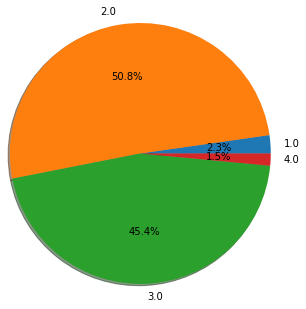

In [ ]:
#PIE CHART
row = data['No. of Bedrooms']
val = list(row)
lab = list(set(row))
s=list()
for i in lab:
    s.append(val.count(i))
plt.pie(s,labels = lab,radius =1.5,autopct='%0.1f%%',shadow = True)
plt.show()

In [ ]:
Price=data["Price"]
Price = Price[Price.between(Price.quantile(.25), Price.quantile(.75))]
Area=data["Area"]
Area = Area[Area.between(Area.quantile(.25), Area.quantile(.75))]
Area=Area.tolist()
Price.mean()

6334028.038271603

**b) Histogram for number of houses with a given area**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e196f5320>]],
      dtype=object)

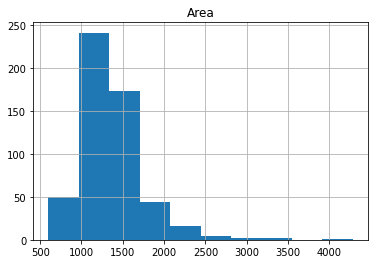

In [ ]:
#HISTOGRAM
data.hist(column='Area')

**c) Bar Graph depicting average price of a house at a given location**

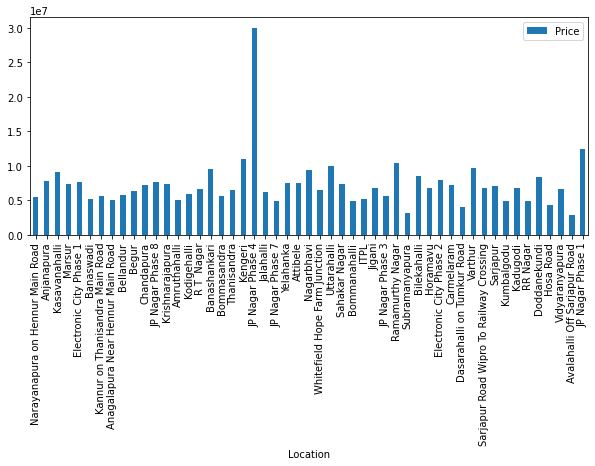

In [ ]:
#BAR GRAPH
temp = dict()
noloc1 = dict()
noloc = set(data['Location'])
chk = 0
for i in noloc:
    temp[i] = 0
    noloc1[i] = 0
for i in data['Location']:
    temp[i] += data['Price'][chk]
    noloc1[i]+=1
    chk+=1
for i in temp:
    temp[i] /= noloc1[i]
    temp[i] = math.floor(temp[i])
df1 = pd.DataFrame({'Location':temp.keys(), 'Price':temp.values()})
df1.plot.bar(x='Location', y='Price', rot=90,figsize=(10,4))

{'boxes': [<matplotlib.lines.Line2D at 0x7f4e19666c50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4e195f5b70>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4e1959c668>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4e196105f8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4e19666550>,
  <matplotlib.lines.Line2D at 0x7f4e195e90f0>]}

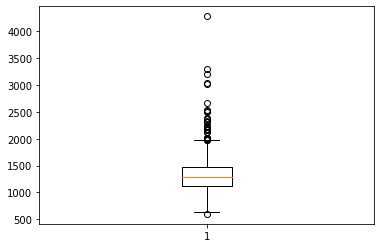

In [ ]:
Area=data['Area']
Area=Area.tolist()
plt.boxplot(Area)

{'boxes': [<matplotlib.lines.Line2D at 0x7f4e19bcf240>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4e19c24f28>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4e19c16080>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4e19c24be0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4e19bcf4a8>,
  <matplotlib.lines.Line2D at 0x7f4e19c240f0>]}

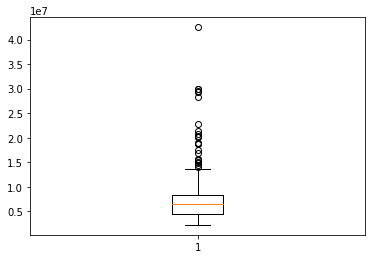

In [ ]:
Price=data['Price'].tolist()
plt.boxplot(Price)

# **4) Normalisation and standardisation**

Area                   1.343380e+03
No. of Bedrooms        2.461538e+00
MaintenanceStaff       1.294559e-01
Gymnasium              9.155722e-01
SwimmingPool           8.273921e-01
Landscaped Gardens     7.166979e-01
JoggingTrack           7.298311e-01
RainWaterHarvesting    6.735460e-01
IndoorGames            5.966229e-01
ShoppingMall           1.031895e-01
Intercom               7.448405e-01
SportsFacility         3.302064e-01
ATM                    9.568480e-02
ClubHouse              6.247655e-01
School                 7.317073e-02
24X7Security           6.960600e-01
PowerBackup            9.193246e-01
Price                  7.061551e+06
dtype: float64
Area                   1.493391e+05
No. of Bedrooms        3.241758e-01
MaintenanceStaff       1.129089e-01
Gymnasium              7.744502e-02
SwimmingPool           1.430828e-01
Landscaped Gardens     2.034237e-01
JoggingTrack           1.975483e-01
RainWaterHarvesting    2.202951e-01
IndoorGames            2.411164e-01
ShoppingMall 

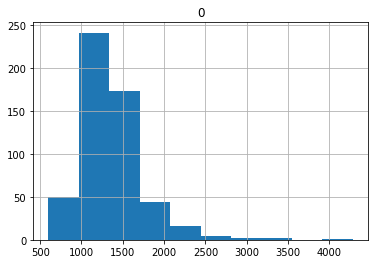

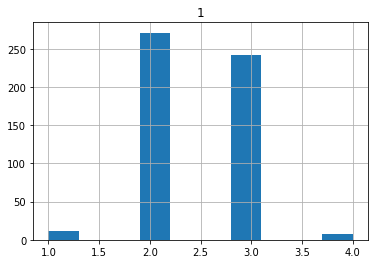

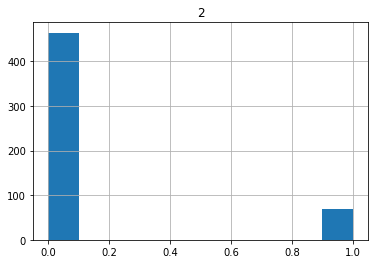

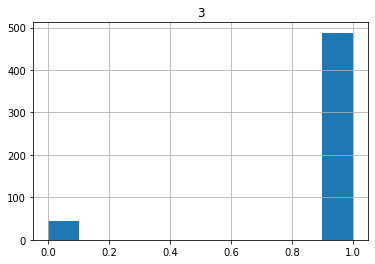

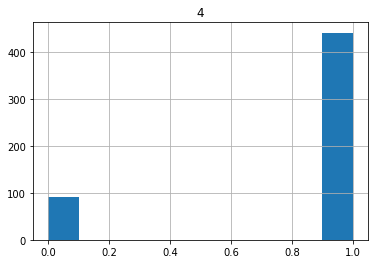

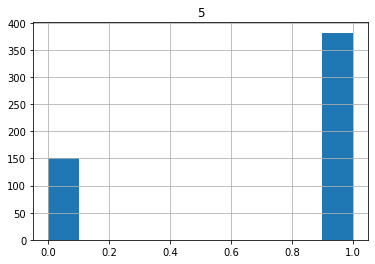

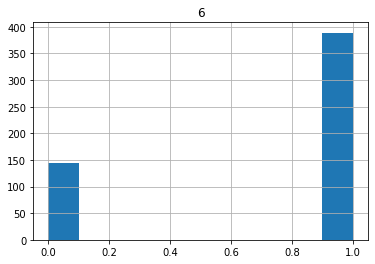

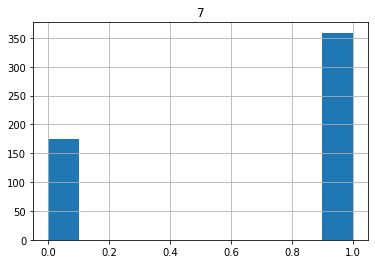

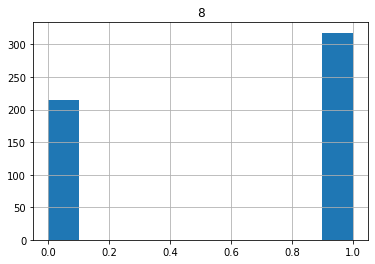

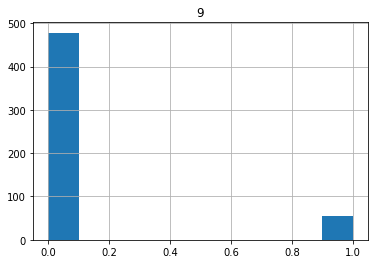

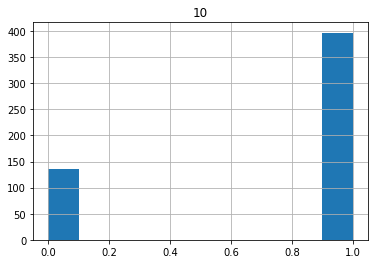

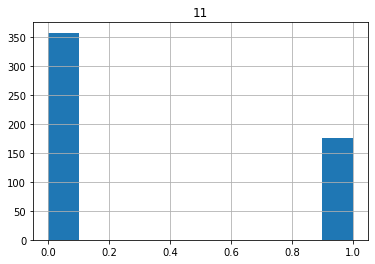

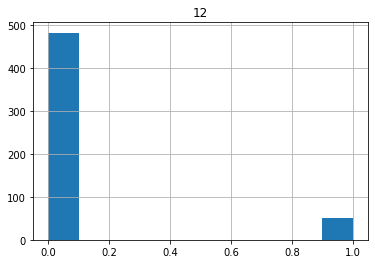

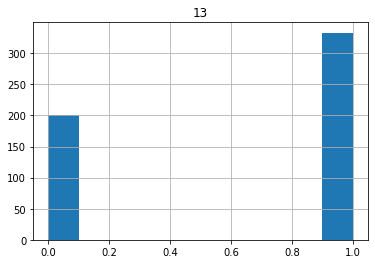

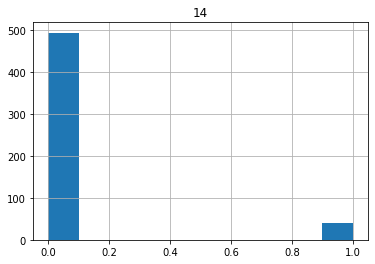

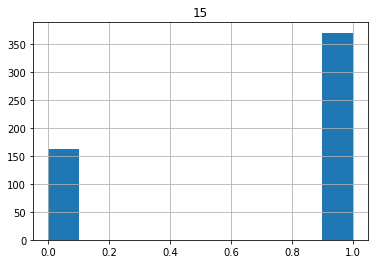

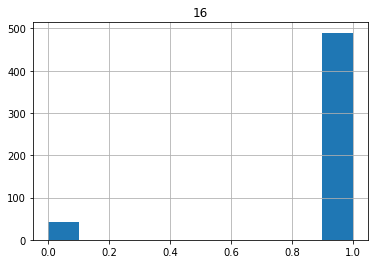

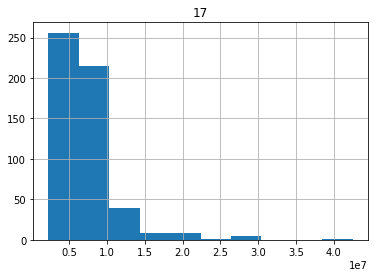

In [ ]:
df=pd.DataFrame(data)
print(df.mean())
print(df.var())
data1=data.select_dtypes(np.number)
df1=pd.DataFrame(data1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=data1.values
xscaled=preprocessing.scale(x)
df2=pd.DataFrame(x)
for name in df2.columns:
    df2.hist(column=name)

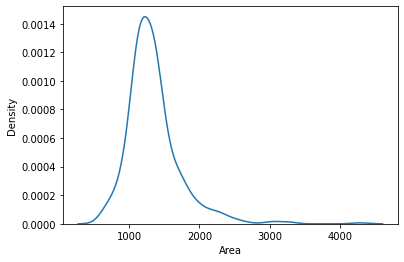

In [ ]:
sns.kdeplot(df.Area)

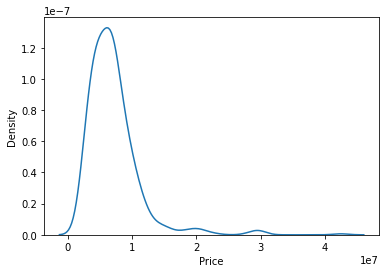

In [ ]:
sns.kdeplot(df.Price)

# **5) Hypothesis Testing**

In [ ]:
price = list(data['Price']);area = list(data['Area'])
price.sort();area.sort() 

lqp = len(price)//4
uqp = 3*lqp
iqrp = price[uqp] -  price[lqp]
lowerp = price[lqp] - 1.5*iqrp
upperp = price[uqp] + 1.5*iqrp
for i in range(len(price)):
  if(price[i]>upperp or price[i]<lowerp):
      price[i] = mean1
lqa = len(area)//4
uqa = 3*lqa
iqra = area[uqa] - area[lqa]
lowera = area[lqa] - 1.5*iqra
uppera = area[uqa] + 1.5*iqra
for i in range(len(area)):
  if(area[i]>uppera or area[i]<lowera):
    area[i] = mean0


In [ ]:
#CHECKING IF THE NULL HYPOTHESIS IS TRUE
X=price
Y=area
result=scipy.stats.pearsonr(X,Y)
result
#(Pearson's Correlation Coefficient,P-value(two tailed))

(0.9257850092152543, 1.7842003863019685e-226)

# **6) Correlation**

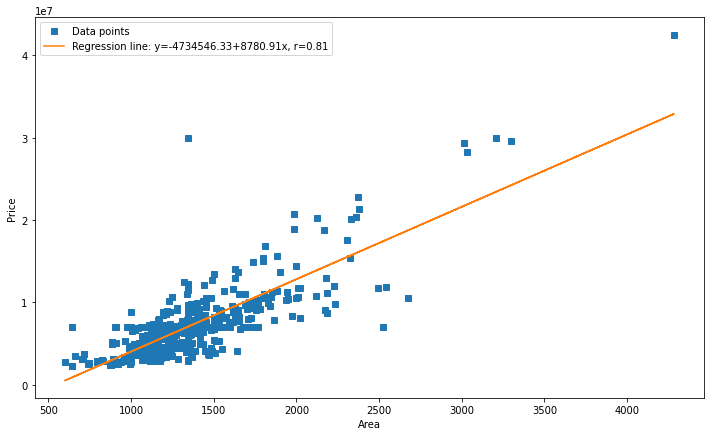

<Figure size 720x504 with 0 Axes>

In [ ]:
slope, intercept, r, p, stderr = scipy.stats.linregress(data['Area'],data['Price'])         
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(data['Area'], data['Price'], linewidth=0, marker='s', label='Data points')
ax.plot(data['Area'], intercept + slope * data['Area'], label=line)
ax.set_xlabel('Area')
ax.set_ylabel('Price')
ax.legend(facecolor='white')
plt.figure(figsize=(10,7))
plt.show()

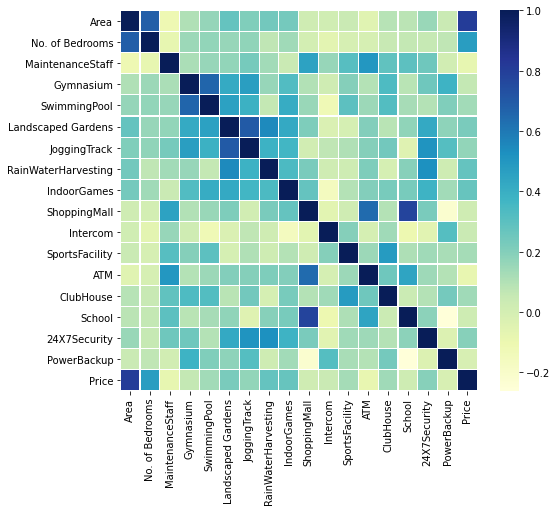

In [ ]:
corrmat = data.corr() 
f, ax = plt.subplots(figsize =(8, 7)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

# **Predicting Cost Of a House using Regression**

In [ ]:
data.drop(["Hospital", "CarParking"], axis = 1, inplace = True) 

In [ ]:
#getting the dependent and independent variables
X = data.iloc[:400, :-1].values   
y = data.iloc[:400, -1].values    #price

In [ ]:
#one hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_test[0])

[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 1.0 0.0 0.0 1012.0 2.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0
 0.0 0.0 1.0 1.0]


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[6508907.26 4500000.  ]
 [8132782.71 7061550.76]
 [7995100.85 7125000.  ]
 [5448258.88 5327000.  ]
 [6517705.   6142000.  ]
 [3718251.16 3372000.  ]
 [5369757.02 4815000.  ]
 [6423010.09 6388000.  ]
 [4585233.   4586000.  ]
 [5705719.   5700000.  ]
 [3201562.92 2984000.  ]
 [5669462.4  4500000.  ]
 [4703981.38 4299000.  ]
 [7157547.78 7211000.  ]
 [2841533.65 2578000.  ]
 [3081694.85 3339000.  ]
 [7189723.27 6900000.  ]
 [4767186.82 4582000.  ]
 [7355547.98 5550000.  ]
 [5567634.94 5416000.  ]
 [5562766.   4975000.  ]
 [6659165.29 6459000.  ]
 [4814118.81 4434000.  ]
 [6908608.15 7181999.  ]
 [5497820.32 4972000.  ]
 [5561851.97 7061550.76]
 [3923059.31 3696000.  ]
 [2439148.17 2653000.  ]
 [6997942.39 6750000.  ]
 [4465583.48 4120000.  ]
 [4623229.3  4928000.  ]
 [2564307.62 7061550.76]
 [5082641.43 7061550.76]
 [5812438.42 5849000.  ]
 [3642031.5  3419000.  ]
 [3926514.4  3645000.  ]
 [4416684.9  3999000.  ]
 [4826861.12 4958000.  ]
 [5525064.9  5036000.  ]
 [7491888.1  8269000.  ]


# Model Evaluation

Explained variance score: This score measures how well our model can account for the variation in our dataset. A score of 1.0 indicates that our model is perfect

In [ ]:
import sklearn.metrics as sm

In [ ]:
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2))

Explain variance score = 0.79


R2 score: This is pronounced as R-squared, and this score refers to the coefficient of determination. This tells us how well the unknown samples will be predicted by our model. An R2 score near 1 means that the model is able to predict the data very well. The best possible score is 1.0, but the score can be negative as well.

In [ ]:
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

R2 score = 0.78


In [ ]:
regressor.predict([[0.0, 0.0, 0.0, 0.0 ,0.0, 0.0, 0.0 ,0.0 ,0.0, 0.0 ,0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 0.0, 0.0 ,0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
 0.0, 1.0, 0.0, 0.0, 1012.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0 ,0.0, 0.0,
 0.0, 0.0, 1.0, 1.0]])

array([6508907.26])